In [2]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.svm import SVC

# Resampling 
from sklearn.utils import resample

## Préparation des données
### Chargement des données

In [3]:
data_stellar = pd.read_csv("./star_classification.csv")
data_stellar.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


### Analyse des données

In [4]:
data_stellar.groupby(['class']).count()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
class,,,,,,,,,,,,,,,,,
GALAXY,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445,59445
QSO,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961,18961
STAR,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594,21594


On voit bien que les 3 classes sont déséquilibrées tels que la distribution est comme suit : 
- GALAXY : 59.445%
- QSO : 18.961%
- STAR : 21.594%

In [5]:
data_stellar.isnull().count()

obj_ID         100000
alpha          100000
delta          100000
u              100000
g              100000
r              100000
i              100000
z              100000
run_ID         100000
rerun_ID       100000
cam_col        100000
field_ID       100000
spec_obj_ID    100000
class          100000
redshift       100000
plate          100000
MJD            100000
fiber_ID       100000
dtype: int64

On voit bien qu'on a aucune valeur manquante dans notre dataset et par conséquent on peut directement visualiser ce dataset

In [6]:
data_stellar.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


On va maintenant passer à une rapide visualisation des données. On commence par observer la distribution des différentes variables 

Text(0.5, 1.0, 'Fiber ID')

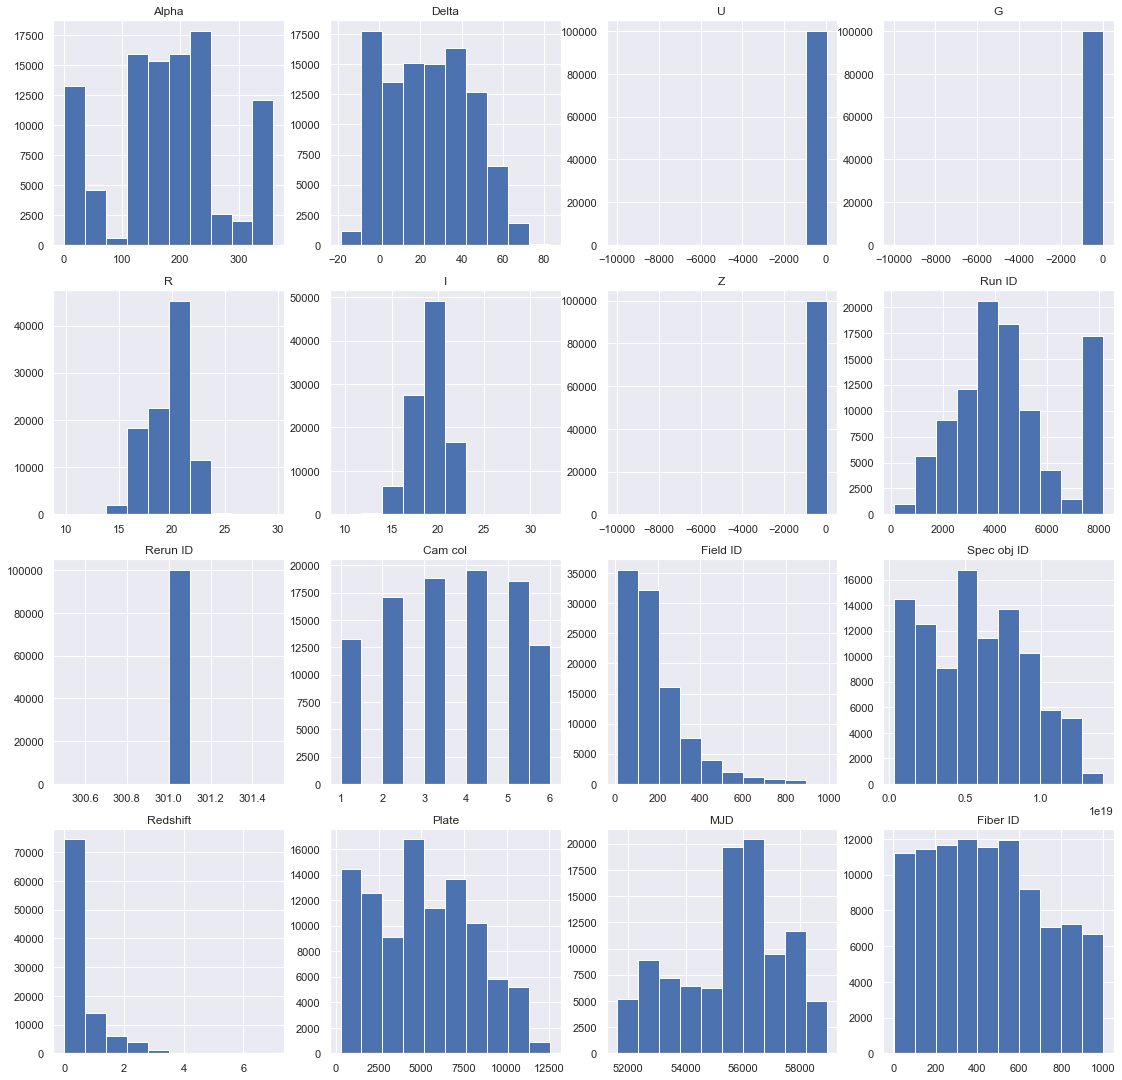

In [11]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(19,19))
plt.subplot(4,4,1)
plt.hist(data_stellar["alpha"])
plt.title("Alpha")
plt.subplot(4,4,2)
plt.hist(data_stellar["delta"])
plt.title("Delta")
plt.subplot(4,4,3)
plt.hist(data_stellar["u"])
plt.title("U")
plt.subplot(4,4,4)
plt.hist(data_stellar["g"])
plt.title("G")
plt.subplot(4,4,5)
plt.hist(data_stellar["r"])
plt.title("R")
plt.subplot(4,4,6)
plt.hist(data_stellar["i"])
plt.title("I")
plt.subplot(4,4,7)
plt.hist(data_stellar["z"])
plt.title("Z")
plt.subplot(4,4,8)
plt.hist(data_stellar["run_ID"])
plt.title("Run ID")
plt.subplot(4,4,9)
plt.hist(data_stellar["rerun_ID"])
plt.title("Rerun ID")
plt.subplot(4,4,10)
plt.hist(data_stellar["cam_col"])
plt.title("Cam col")
plt.subplot(4,4,11)
plt.hist(data_stellar["field_ID"])
plt.title("Field ID")
plt.subplot(4,4,12)
plt.hist(data_stellar["spec_obj_ID"])
plt.title("Spec obj ID")
plt.subplot(4,4,13)
plt.hist(data_stellar["redshift"])
plt.title("Redshift")
plt.subplot(4,4,14)
plt.hist(data_stellar["plate"])
plt.title("Plate")
plt.subplot(4,4,15)
plt.hist(data_stellar["MJD"])
plt.title("MJD")
plt.subplot(4,4,16)
plt.hist(data_stellar["fiber_ID"])
plt.title("Fiber ID")

On observe maintenant les distribution moyennes par classes, en s'assurant d'utiliser un histogramme normalisé étant donné que les classes sont grandement déséquilibrées et donc pour bien montrer la distribution efficacement

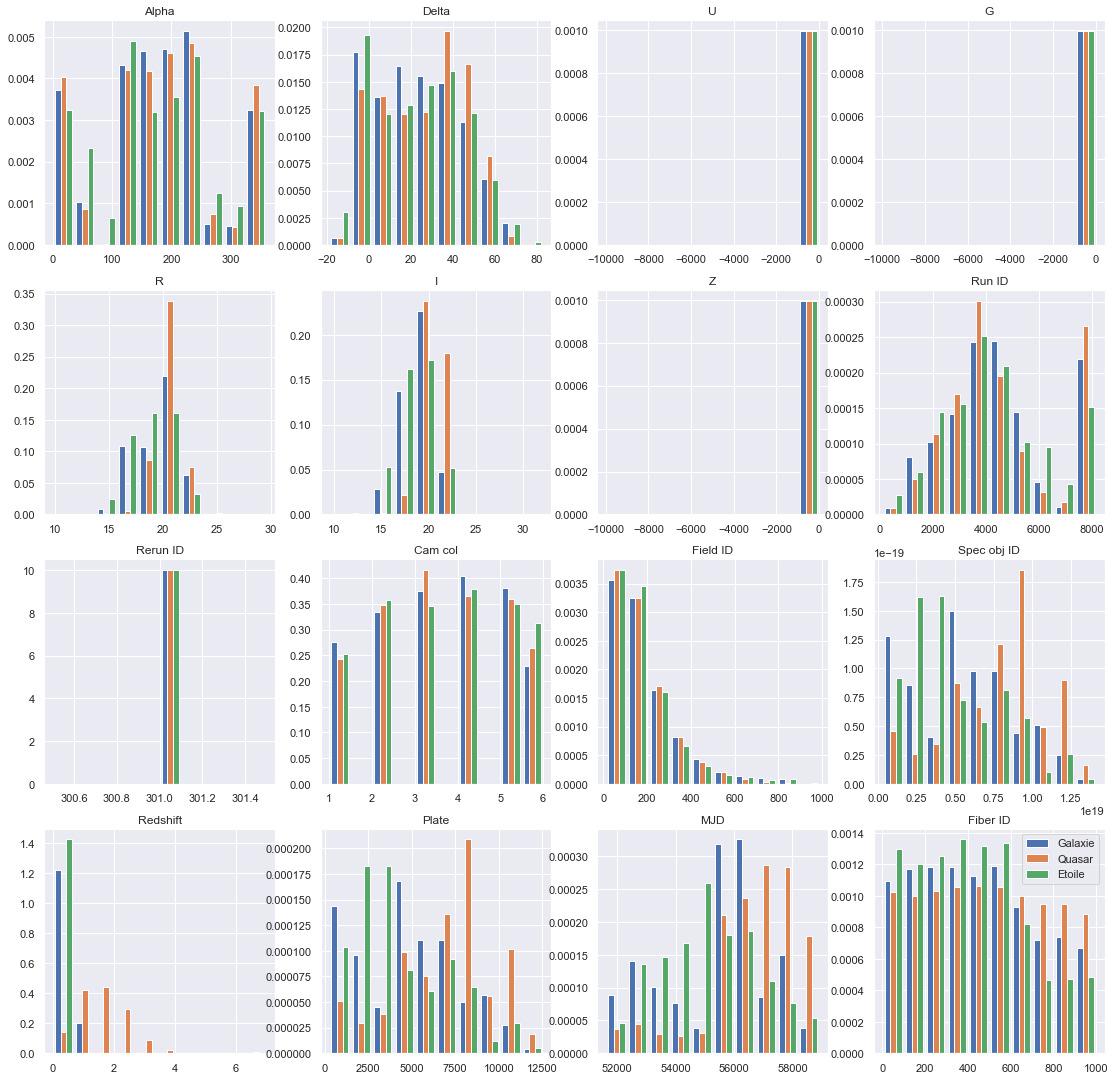

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(19,19))
plt.subplot(4,4,1)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["alpha"],
    data_stellar[data_stellar["class"]=='QSO']["alpha"],
    data_stellar[data_stellar["class"]=='STAR']["alpha"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Alpha")
plt.subplot(4,4,2)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["delta"],
    data_stellar[data_stellar["class"]=='QSO']["delta"],
    data_stellar[data_stellar["class"]=='STAR']["delta"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Delta")
plt.subplot(4,4,3)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["u"],
    data_stellar[data_stellar["class"]=='QSO']["u"],
    data_stellar[data_stellar["class"]=='STAR']["u"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("U")
plt.subplot(4,4,4)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["g"],
    data_stellar[data_stellar["class"]=='QSO']["g"],
    data_stellar[data_stellar["class"]=='STAR']["g"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("G")
plt.subplot(4,4,5)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["r"],
    data_stellar[data_stellar["class"]=='QSO']["r"],
    data_stellar[data_stellar["class"]=='STAR']["r"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("R")
plt.subplot(4,4,6)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["i"],
    data_stellar[data_stellar["class"]=='QSO']["i"],
    data_stellar[data_stellar["class"]=='STAR']["i"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("I")
plt.subplot(4,4,7)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["z"],
    data_stellar[data_stellar["class"]=='QSO']["z"],
    data_stellar[data_stellar["class"]=='STAR']["z"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Z")
plt.subplot(4,4,8)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["run_ID"],
    data_stellar[data_stellar["class"]=='QSO']["run_ID"],
    data_stellar[data_stellar["class"]=='STAR']["run_ID"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Run ID")
plt.subplot(4,4,9)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["rerun_ID"],
    data_stellar[data_stellar["class"]=='QSO']["rerun_ID"],
    data_stellar[data_stellar["class"]=='STAR']["rerun_ID"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Rerun ID")
plt.subplot(4,4,10)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["cam_col"],
    data_stellar[data_stellar["class"]=='QSO']["cam_col"],
    data_stellar[data_stellar["class"]=='STAR']["cam_col"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Cam col")
plt.subplot(4,4,11)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["field_ID"],
    data_stellar[data_stellar["class"]=='QSO']["field_ID"],
    data_stellar[data_stellar["class"]=='STAR']["field_ID"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Field ID")
plt.subplot(4,4,12)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["spec_obj_ID"],
    data_stellar[data_stellar["class"]=='QSO']["spec_obj_ID"],
    data_stellar[data_stellar["class"]=='STAR']["spec_obj_ID"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Spec obj ID")
plt.subplot(4,4,13)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["redshift"],
    data_stellar[data_stellar["class"]=='QSO']["redshift"],
    data_stellar[data_stellar["class"]=='STAR']["redshift"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Redshift")
plt.subplot(4,4,14)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["plate"],
    data_stellar[data_stellar["class"]=='QSO']["plate"],
    data_stellar[data_stellar["class"]=='STAR']["plate"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Plate")
plt.subplot(4,4,15)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["MJD"],
    data_stellar[data_stellar["class"]=='QSO']["MJD"],
    data_stellar[data_stellar["class"]=='STAR']["MJD"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("MJD")
plt.subplot(4,4,16)
plt.hist([
    data_stellar[data_stellar["class"]=='GALAXY']["fiber_ID"],
    data_stellar[data_stellar["class"]=='QSO']["fiber_ID"],
    data_stellar[data_stellar["class"]=='STAR']["fiber_ID"],
    ], label=['Galaxie', 'Quasar', 'Etoile'], density=True)
plt.title("Fiber ID")
plt.legend()

Ainsi on voit bien que plusieurs variables ne sont pas significative dans leur classification : 
- Rerun ID
- U
- G 
- Z

Donc on analysera par la suite l'intérêt de ces variables et leur suppression si ça ajoute de la qualité à la classification. On analyse maintenant les distributions de chaque 